##**a. Praproses Data (Data Preprocessing)**

###**Import Library**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Activation, Dropout
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
%matplotlib inline
warnings.filterwarnings("ignore")

###**Import Dataset**

In [ ]:
dfinsur = pd.read_csv("https://raw.githubusercontent.com/jasminemutia/test/main/insurance.csv")

In [ ]:
dfinsur.head(5)

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,3009,0,1,3,16884.92400,1
1,18,1,33.770,3008,1,0,2,1725.55230,1
2,28,1,33.000,3009,3,0,2,4449.46200,0
3,33,1,22.705,10009,0,0,1,21984.47061,0
4,32,1,28.880,8010,0,0,1,3866.85520,1


In [ ]:
print(type(dfinsur))
row, col = dfinsur.shape
print("Jumlah baris dalam data: ", row)
print("Jumlah kolom dalam data: ", col)

<class 'pandas.core.frame.DataFrame'>
Jumlah baris dalam data:  1338
Jumlah kolom dalam data:  9


Data insurance mempunya 1338 baris dan 9 kolom.

In [ ]:
dfinsur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   steps           1338 non-null   int64  
 4   children        1338 non-null   int64  
 5   smoker          1338 non-null   int64  
 6   region          1338 non-null   int64  
 7   charges         1338 non-null   float64
 8   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 94.2 KB


Setiap kolom pada dataset memiliki 1338 data dengan tipe data yang ada yaitu float dan integer.

###**Checking Missing Value**

In [ ]:
print(dfinsur.isna().sum())
dfinsur.shape

age               0
sex               0
bmi               0
steps             0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64


(1338, 9)

Setelah melakukan pengecekan, output 0 dari tiap variable diatas menunjukkan tidak adanya missing value dari semua variable.

In [ ]:
dfinsur.columns

Index(['age', 'sex', 'bmi', 'steps', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

Terdapat 9 kolom pada dataset yaitu 'age', 'sex', 'bmi', 'steps', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'

###**Feature Scaling**

In [ ]:
dfinsur

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,3009,0,1,3,16884.92400,1
1,18,1,33.770,3008,1,0,2,1725.55230,1
2,28,1,33.000,3009,3,0,2,4449.46200,0
3,33,1,22.705,10009,0,0,1,21984.47061,0
4,32,1,28.880,8010,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,4008,3,0,1,10600.54830,0
1334,18,0,31.920,3003,0,0,0,2205.98080,1
1335,18,0,36.850,3008,0,0,2,1629.83350,1
1336,21,0,25.800,8009,0,0,3,2007.94500,0


Dari output diatas, dapat dilihat bahwa kolom age, bmi, steps, dan charges memiliki skala yang sangat jauh dibandingkan kolom lainnya.

In [ ]:
scalling = MinMaxScaler()
col = ['age', 'bmi', 'steps', 'charges']
dfinsur[col] = scalling.fit_transform(dfinsur[col])

Pada kolom 'age', 'bmi', 'steps', 'charges' dilakukan scaling untuk mengubah datanya di rentang nilai 0 sampai 1. Ini dilakukan untuk menyesuaikan nilai data dengan kolom lainnya.

In [ ]:
# Setelah scaling
dfinsur

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
0,0.021739,0,0.321227,0.001284,0,1,3,0.251611,1
1,0.000000,1,0.479150,0.001141,1,0,2,0.009636,1
2,0.217391,1,0.458434,0.001284,3,0,2,0.053115,0
3,0.326087,1,0.181464,0.999857,0,0,1,0.333010,0
4,0.304348,1,0.347592,0.714693,0,0,1,0.043816,1
...,...,...,...,...,...,...,...,...,...
1333,0.695652,1,0.403820,0.143795,3,0,1,0.151299,0
1334,0.000000,0,0.429379,0.000428,0,0,0,0.017305,1
1335,0.000000,0,0.562012,0.001141,0,0,2,0.008108,1
1336,0.065217,0,0.264730,0.714551,0,0,3,0.014144,0


Setelah melakukan scaling, distribusi nilai dari tiap kolom data menjadi lebih rata. Nilai pada tiap kolom tidak terlalu jauh sehingga lebih baik untuk melanjutkan ke tahap modelling.

*   Problem yang ditemukan pada dataset ini adalah nilai distribusi data tiap variable sangat berbeda, sehingga dapat menimbulkan hasil prediksi yang bias.
*   Pendekatan yang dilakukan adalah dengan melakukan scaling. Scaling dilakukan dengan method MinMaxScaler() sehingga rentang data antar variable tidak terlalu jauh. MinMaxScaler() mengubah rentang nilai pada variable yang di scaling ke nilai di antara 0 sampai 1.
*   Pendekatan lain yang akan dilakukan adalah feature scaling dan balancing data. Feature scaling dilakukan untuk menggunakan variable yang berpengaruh saja dalam modelling dan menghapus variable yang kurang berpengaruh. Sedangkan balancing data dilakukan untuk menangani ketidakseimbangan data antar kelas. Pendekatan ini dilakukan pada proses eksplorasi data.




##**b. Eksplorasi Data (Exploratory Data Analysis)**

###**Data Description**

In [ ]:
dfinsur.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,0.461022,0.305434,0.0,0.195652,0.456522,0.717391,1.0
sex,1338.0,0.505232,0.500160,0.0,0.000000,1.000000,1.000000,1.0
bmi,1338.0,0.395572,0.164062,0.0,0.278080,0.388485,0.504002,1.0
steps,1338.0,0.332186,0.350020,0.0,0.001141,0.143652,0.713837,1.0
children,1338.0,1.094918,1.205493,0.0,0.000000,1.000000,2.000000,5.0
smoker,1338.0,0.204783,0.403694,0.0,0.000000,0.000000,0.000000,1.0
region,1338.0,1.515695,1.104885,0.0,1.000000,2.000000,2.000000,3.0
charges,1338.0,0.193916,0.193301,0.0,0.057757,0.131849,0.247700,1.0
insuranceclaim,1338.0,0.585202,0.492871,0.0,0.000000,1.000000,1.000000,1.0


Dari output diatas, dapat dilihat banyaknya data, nilai rata-rata, standar deviasi, nilai minimal,
nilai q1 (kuartil bawah), median (q2), nilai q3 (kuartil atas), nilai maksimum dari tiap variable dalam dataset.

*   Terdapat 1338 baris pada tiap kolom
*   Maksimum children yang dimiliki adalah 5 dan nilai minimum-nya 0.
*   Nilai bmi rata-rata berkisar pada 0.395572 atau 39.5 (nilai awal sebelum scaling)
*   Steps rata-rata yang diambil customer berkisar pada  	0.332186 atau 3321 steps (nilai awal) per hari.
*   Pada kolom sex, 1 berarti laki-laki dan 0 berarti perempuan.
*   Pada kolom smoker, 1 berarti perokok dan 0 berarti tidak merokok.
*   Pada kolom insuranceclaim, 1 artinya klaim asuransi diterima dan 0 berarti klaim asuransi ditolak.



###**Data Distribution**

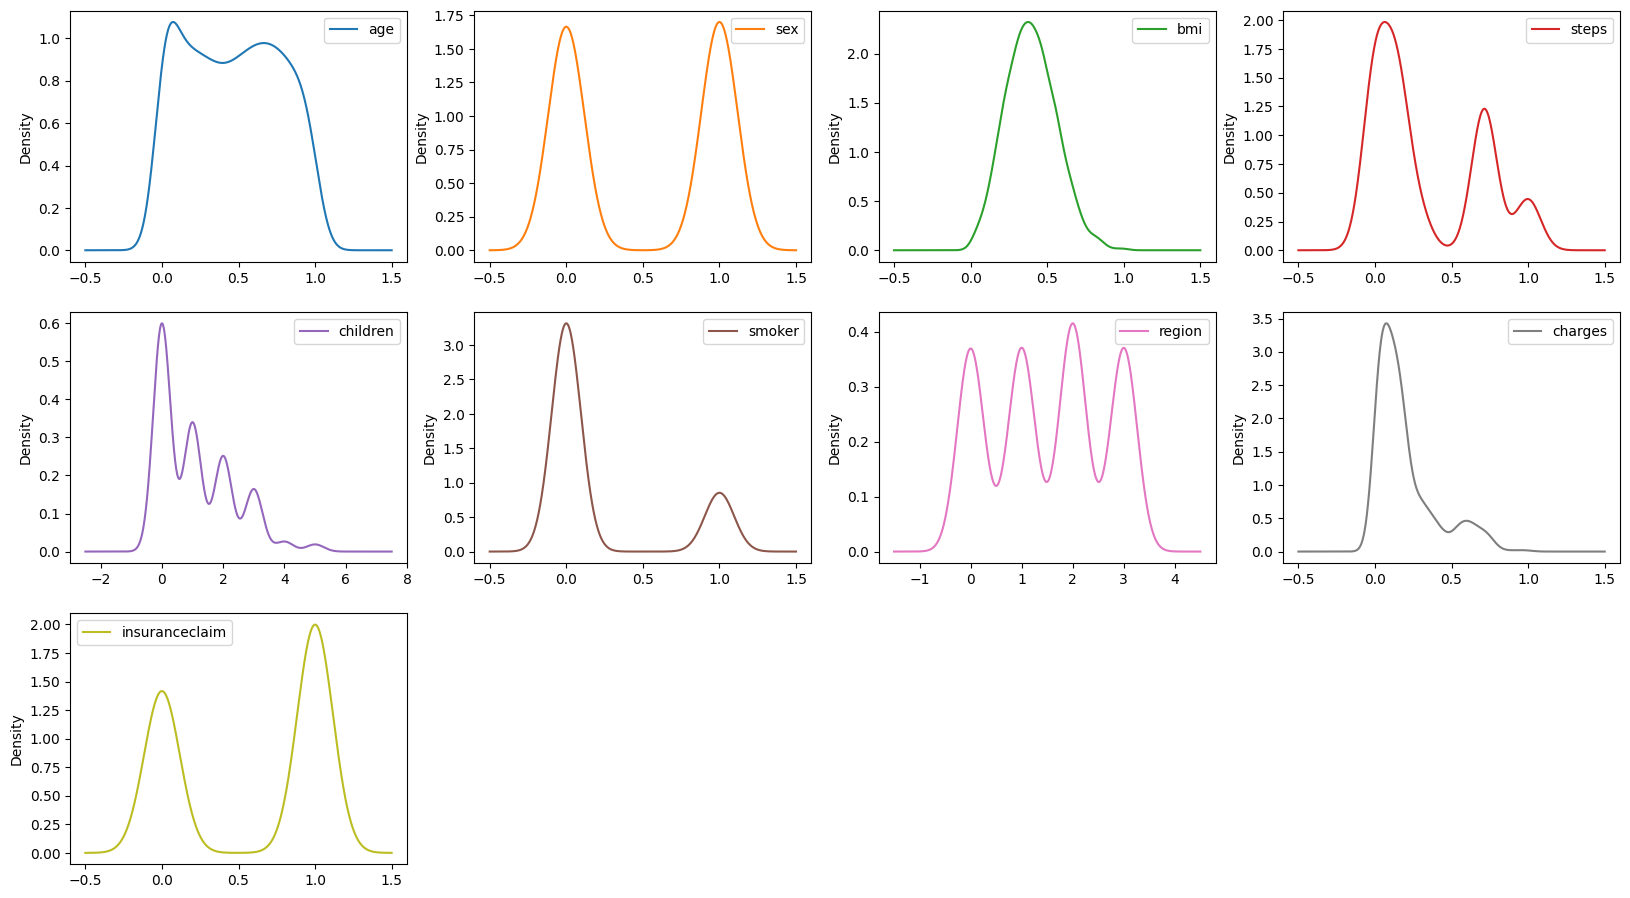

In [ ]:
dfinsur.plot(kind='density', subplots=True, layout=(4,4), figsize=(20, 15), sharex=False)
plt.show()

Output diatas menunjukkan visualisasi dari distribusi data tiap variable.

###**Checking Outliers**

age                  Axes(0.125,0.712609;0.168478x0.167391)
sex               Axes(0.327174,0.712609;0.168478x0.167391)
bmi               Axes(0.529348,0.712609;0.168478x0.167391)
steps             Axes(0.731522,0.712609;0.168478x0.167391)
children             Axes(0.125,0.511739;0.168478x0.167391)
smoker            Axes(0.327174,0.511739;0.168478x0.167391)
region            Axes(0.529348,0.511739;0.168478x0.167391)
charges           Axes(0.731522,0.511739;0.168478x0.167391)
insuranceclaim        Axes(0.125,0.31087;0.168478x0.167391)
dtype: object

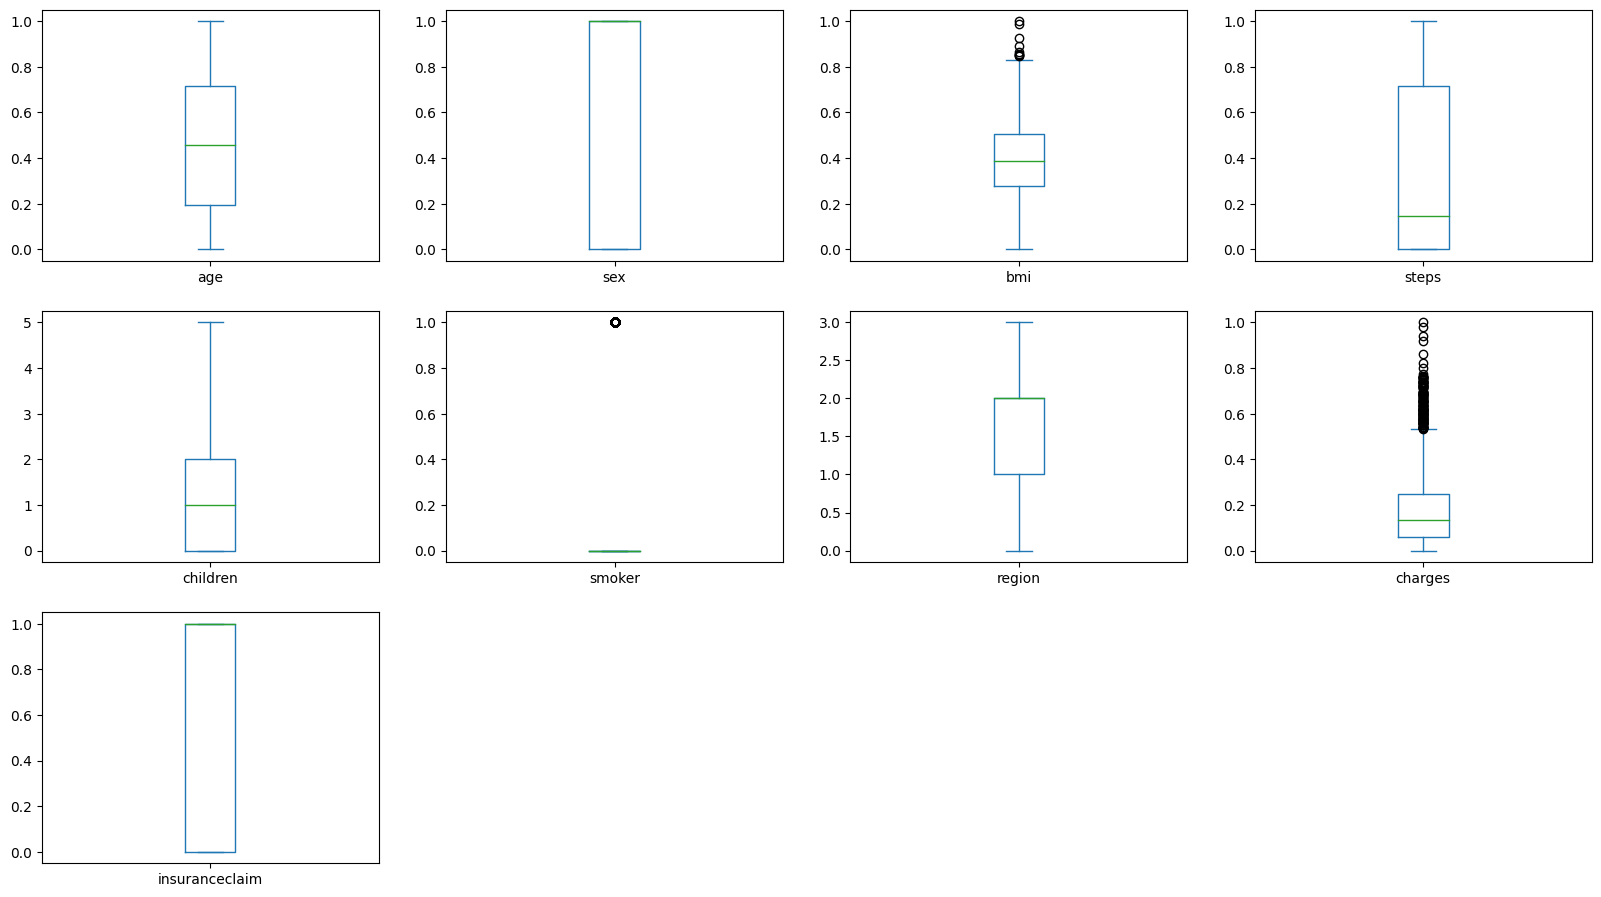

In [ ]:
dfinsur.plot(kind= 'box' , subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(20,15))

Dari output diatas ditemukan banyak data outliers pada variable charges, bmi, dan smoker.
*   Outliers pada variable charges wajar karena tiap customer memiliki penyakit yang berbeda sehingga sebagian customer memiliki tanggungan biaya medis yang diatas rata-rata distribusi data lainnya, sehingga outliers tidak perlu dihapus.
*   Outliers pada bmi juga wajar disebabkan nilai bmi tiap customer berbeda tergantung dari proporsi tubuhnya, sehingga sebagian memiliki nilai bmi diatas rata-rata distribusi data lainnya (outliers tidak perlu dihapus).
*   Outliers pada smoker disebabkan nilai 0 menandakan tidak merokok dan 1 menandakan merokok, output diatas menunjukkan customer tidak merork lebih banyak sehingga customer yang tidak merokok (bernilai 1) dianggap sebagai data outliers.





###**Checking Duplicated Data**

In [ ]:
print(dfinsur.shape)
print(dfinsur[dfinsur.duplicated()].shape)

(1338, 9)
(0, 9)


*   dfinsur mempunyai 1338 baris dan 9 kolom of data
*   Setelah dicheck dengan duplicated() method ternyata tidak ada data yang terduplikasi

###**Checking Correlation**

<Axes: >

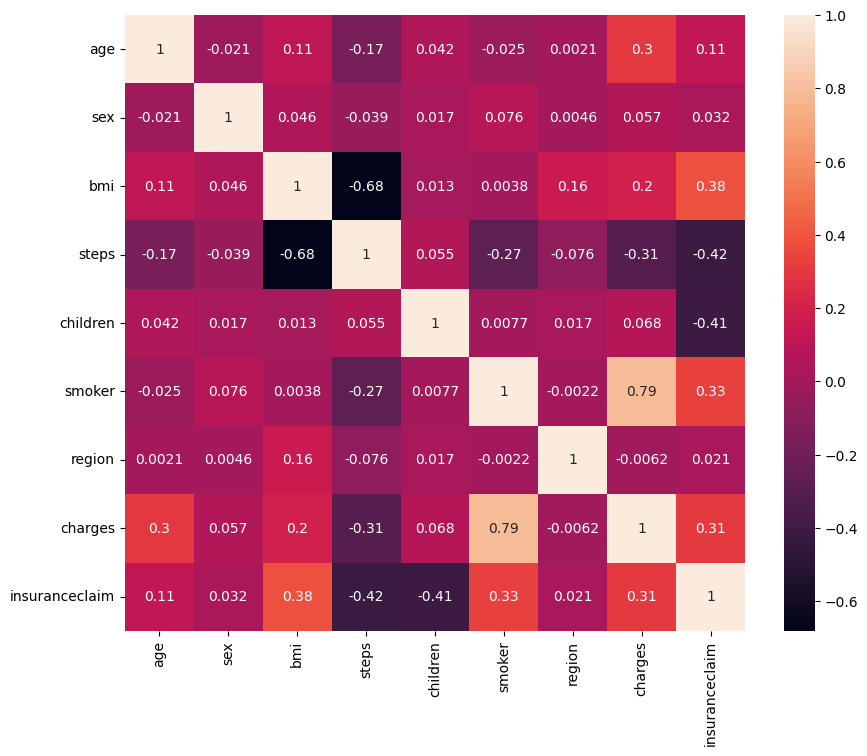

In [ ]:
plt.figure(figsize = [10, 8])
sns.heatmap(dfinsur.corr(), annot = True)

Output diatas menunjukkan korelasi antar variable. Korelasi tertinggi antara  variable smoker dan charges sebesar 0.79

###**Feature Selection**

In [ ]:
dfinsur = dfinsur.drop(['region'], axis=1)

Setelah melakukan EDA dan mengecek korelasi, variable region dihapus karena memiliki pengaruh yang kecil dalam peningkatan hasil akurasi (korelasi-nya kecil).

###**Creating Train, Test, and Validation Set**


In [ ]:
X = dfinsur.drop(['insuranceclaim'], axis=1)
y = dfinsur['insuranceclaim']

Tentukan nilai target pada variable Y yaitu  'insuranceclaim' dan hapus kolom 'insuranceclaim' dari dataframe pada variable X.

In [ ]:
# Split data 80% training and 20% for remain set
X_train, X_remain, y_train, y_remain = train_test_split(X, y, train_size=0.8, random_state=42)

# Split the remaining data into 10% test set and 10% validation set
X_test, X_val, y_test, y_val = train_test_split(X_remain,y_remain, test_size=0.5, random_state=42)

Dataset dibagi menjadi 3 bagian dengan proporsi 80% training set, 10% test set, dan 10% validation set.

In [ ]:
over = SMOTE(sampling_strategy='auto', random_state=42)
X_train, y_train = over.fit_resample(X_train, y_train)

Pada modelling ini digunakan teknik oversampling dengan melakukan balancing data terlebih dahulu menggunakan method SMOTE().

In [ ]:
print('Train set: {} baris x {} kolom'.format(X_train.shape[0],
                                               X_train.shape[1]))
print('Test set: {} baris x {} kolom'.format(X_test.shape[0],
                                               X_test.shape[1]))
print('Validation set: {} baris x {} kolom'.format(X_val.shape[0],
                                               X_val.shape[1]))

Train set: 1244 baris x 7 kolom
Test set: 134 baris x 7 kolom
Validation set: 134 baris x 7 kolom


Output diatas menunjukkan jumlah data setelah dibagi dengan proporsi 80% training set, 10% test set, dan 10% validation set.

*   Setelah melakukan EDA, ditemukan permasalahan yaitu variable region yang kurang berpengaruh terhadap klaim asuransi. Ini sesuai dengan nilai korelasi region dengan insuranceclaim. Sehingga variable region perlu dihapus.
*   Selain itu, perlu dilakukan balancing data menggunakan method SMOTE() untuk menangani class imbalance pada data agar hasil akurasi dalam prediksi dapat meningkat.



##**c. Arsitektur Baseline**

In [ ]:
# input
inp = X_train.shape[1]
hidden = 2 * inp
n_class = 2
model = Sequential()

# hidden layer
model.add(Dense(hidden, input_dim=inp, activation='relu'))
model.add(Dense(hidden, activation='relu'))

# output layer
model.add(Dense(n_class, activation='softmax'))

# model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                112       
                                                                 
 dense_1 (Dense)             (None, 14)                210       
                                                                 
 dense_2 (Dense)             (None, 2)                 30        
                                                                 
Total params: 352
Trainable params: 352
Non-trainable params: 0
_________________________________________________________________


Output diatas menunjukkan model arsitektur dengan 2 hidden layer dan 1 output layer. Dalam arsitektur model, terdapat 352 parameter yang diikutsertakan dalam training (total dari parameter tiap layer).

*   Model architecture diatas terdiri dari 3 fully connected layer, dengan jumlah neuron pada tiap hidden layer adalah 14 neuron. Sedangkan pada output layer terdiri dari 2 neuron.
*   Layer pertama yaitu "dense" pada output diatas terdiri dari 112 parameters yang dapat diatur untuk menghitung weight dan bias dari output layer. Terdapat 14 neuron pada layer pertama. Layer ini menggunakan fungsi aktivasi ReLU.
*   Layer kedua yaitu "dense_1" pada output diatas terdiri dari 210 parameters dengan 14 neuron. Layer ini menggunakan fungsi aktivasi ReLU.
*   Layer terakhir (layer output) yaitu "dense_2" pada output diatas terdiri 30 parameters dengan 2 neuron (sesuai dengan jumlah kelas pada model). Layer ini menggunakan fungsi aktivasi softmax.



In [ ]:
optimizer = Adam(lr=0.001)
loss = 'categorical_crossentropy'

# compile model
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

Model arsitektur diatas di compile menggunakan optimizer Adam. Loss function yang digunakan yaitu categorical_crossentropy dan nilai akurasi sebagai metrics accuracy.

##**d. Modifikasi Arsitektur**

In [ ]:
# input
inp = X_train.shape[1]

hidden = 2 * inp
n_class = 2
dropout_rate = 0.3

# buat model Sequential
model = Sequential()

# layer 1
model.add(Dense(hidden, input_dim=inp, activation='relu'))
model.add(Dropout(dropout_rate))

# layer 2
model.add(Dense(hidden, activation='relu'))
model.add(Dropout(dropout_rate))

# layer 3
model.add(Dense(hidden, activation='relu'))
model.add(Dropout(dropout_rate))

# output layer
model.add(Dense(n_class, activation='softmax'))

# model architecture
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 14)                112       
                                                                 
 dropout (Dropout)           (None, 14)                0         
                                                                 
 dense_4 (Dense)             (None, 14)                210       
                                                                 
 dropout_1 (Dropout)         (None, 14)                0         
                                                                 
 dense_5 (Dense)             (None, 14)                210       
                                                                 
 dropout_2 (Dropout)         (None, 14)                0         
                                                                 
 dense_6 (Dense)             (None, 2)                

Output diatas menunjukkan model arsitektur dengan 3 hidden layer dan 1 output layer. Dalam arsitektur model, terdapat 562 parameter yang diikutsertakan dalam training. Disini, saya melakukan modifikasi dari baseline arsitektur dengan menambahkan 1 hidden layer dan layer dropout untuk mencegah terjadinya overfitting. Droupout digunakan sebesar 0.3 (30%).
*  Layer pertama yaitu "dense_3" memiliki 112 parameter dan 14 neuron. Dropout layer ditempatkan setelah dense layer pertama. Activation function pada layer ini adalah ReLU.
*  Layer kedua yaitu "dense_4" memiliki 210 parameter dan 14 neuron. Dropout layer ditempatkan setelah dense layer kedua. Activation function pada layer ini adalah ReLU.
*   Layer ketiga yaitu "dense_5" memiliki 210 parameter dan 14 neuron. Dropout layer ditempatkan setelah dense layer ketiga. Activation function pada layer ini adalah ReLU.
*   Layer terakhir (output layer) yaitu " dense_6" memiliki 2 neuron, sesuai dengan jumlah kelas pada data yang digunakan dalam model. Activation function pada layer ini adalah softmax.





In [ ]:
# compile model
optimizer = Adam(lr=0.001)
loss = 'categorical_crossentropy'
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

##**e. Evaluasi Model Arsitektur**

In [ ]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

In [ ]:
# Train the Model
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on test set
y_predict = model.predict(X_test)
y_pred_class = np.argmax(y_predict, axis=1)

# Calculate accuracy, precision, recall, dan f1-score
acc = accuracy_score(y_test, y_pred_class)
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
f1_score = f1_score(y_test, y_pred_class)

Epoch 1/30
39/39 [==============================] - 2s 16ms/step - loss: 0.7257 - accuracy: 0.5113 - val_loss: 0.6699 - val_accuracy: 0.7090
Epoch 2/30
39/39 [==============================] - 0s 6ms/step - loss: 0.6789 - accuracy: 0.5772 - val_loss: 0.6511 - val_accuracy: 0.7313
Epoch 3/30
39/39 [==============================] - 0s 10ms/step - loss: 0.6445 - accuracy: 0.6326 - val_loss: 0.6089 - val_accuracy: 0.7910
Epoch 4/30
39/39 [==============================] - 0s 9ms/step - loss: 0.6048 - accuracy: 0.6937 - val_loss: 0.5410 - val_accuracy: 0.8134
Epoch 5/30
39/39 [==============================] - 0s 7ms/step - loss: 0.5582 - accuracy: 0.7363 - val_loss: 0.4843 - val_accuracy: 0.8284
Epoch 6/30
39/39 [==============================] - 0s 9ms/step - loss: 0.5340 - accuracy: 0.7580 - val_loss: 0.4508 - val_accuracy: 0.8582
Epoch 7/30
39/39 [==============================] - 0s 7ms/step - loss: 0.5104 - accuracy: 0.7605 - val_loss: 0.4308 - val_accuracy: 0.8582
Epoch 8/30
39/39 [

Setelah melakukan training data, dapat dilihat perbandingan nilai accuracy dengan val_accuracy tidak terlalu jauh. Hal ini menunjukkan bahwa model cukup baik dan tidak overfitting.

In [ ]:
# Print the result
print('Accuracy Score: {:.3f}'.format(acc))
print('Precision Score: {:.3f}'.format(precision))
print('Recall Score: {:.3f}'.format(recall))
print('F1-Score Score: {:.3f}'.format(f1_score))

Accuracy Score: 0.896
Precision Score: 0.923
Recall Score: 0.900
F1-Score Score: 0.911


Dari hasil model architecture diatas, nilai keseluruhan accuracy sebesar 89%, nilai precision 92%, recall 90%, dan F1-score sebesar 91%. Hasil ini menunjukkan model architecture yang dibuat sudah cukup baik karena perbedaan antara keempat nilai tidak terlalu jauh.

##**f. Video Presentasi**

Link Video : https://youtu.be/Is6Ih-38z7M